# 1. Nonlinear Models

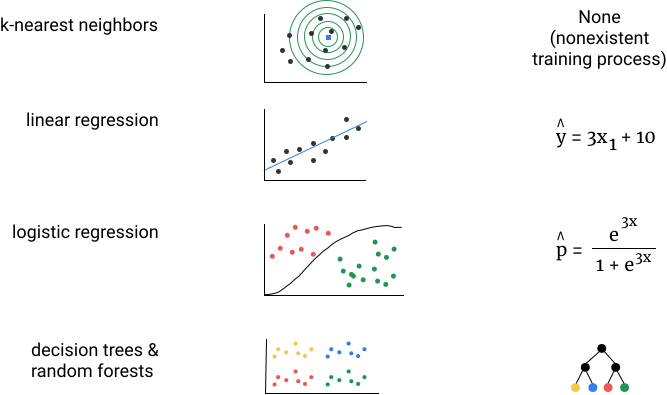

In [1]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/241/recap_models.svg')

**Because these are all supervised machine learning models, we repeated a similar process when using each model:**

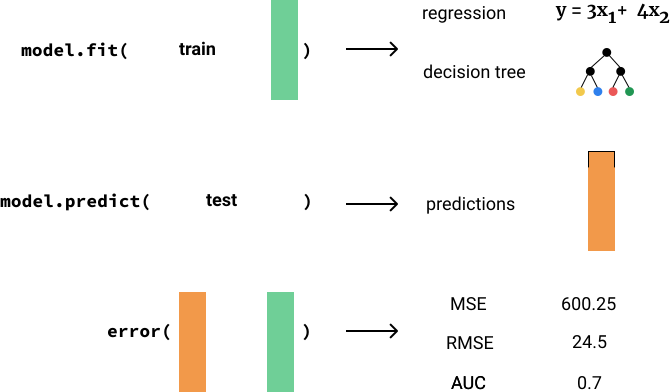

In [2]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/241/ml_process.svg')

**`A deep neural network is a specific type of neural network that excels at capturing nonlinear relationships in data.`**

* Deep neural networks have some ability to discover how to structure the nonlinear transformations during the training process automatically

# 2. Introduction to Graphs

* `Neural networks are usually represented as graphs.` A graph is a data structure that consists of nodes (represented as circles) that are connected by edges (represented as lines).

* Graphs are commonly used to represent how components of a system are related or linked. For example, the Facebook Social Graph describes how all of the users on Facebook are connected to each other (and this graph is changing constantly as friends are added and removed). Google Maps uses graphs to represent locations in the physical world as nodes and roads as edges.

* `Graphs are a highly flexible data structure; you can even represent a list of values as a graph. Graphs are often categorized by their properties, which act as constraints.` 

* One way graphs can be categorized is the presence of edge direction.
  * Undirected graph
  * Directed graph
    * Cyclic graph
    * acyclic graph

# 3. Computational Graphs

* Graphs provide a mental model for thinking and reasoning about a specific class of models -- those that consist of a series of functions that are executed in a specific order. In the context of neural networks, `graphs let us compactly express a pipeline of functions that we want to be executed in succession.`

* At the heart of neural network **`models is the successive computation of functions. This is known as a computational graph.`**

* `A computational graph uses nodes to describe variables and edges to describe how variables are combined.` 

# 4. A Neural Network That Performs Linear Regression

* If you recall, a linear regression model is represented as:

### $\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$

Where:

* $a_0$ represents the intercept (also known as the bias)
* $a_1$ to $a_n$ represent the trained model weights
* $x_1$ to $x_n$ represent the features
* $\hat{y}$ represents the predicted value

* The first step is to rewrite this model using linear algebra notation, as a product of two vectors:

$Xa^T  =  \hat{y}$

**Neural Network Representation**

In the neural network representation of this model:

* **each feature** column in a data set is represented as an **input neuron**
* **each weight** value is represented as an arrow from the feature column it multiples to the **output neuron**

* The neurons and arrows act as a visual metaphor for the weighted sum, which is how the feature columns and weights are combined.

**Inspired by biological neural networks, an activation function determines if the neuron fires or not. In a neural network model, the activation function transforms the weighted sum of the input values.**

# 5. Generating Regression Data

* Generating data ourselves gives us more control of the properties of the data set `(e.g. like the number of features, observations, and the noise in the features)`. Data sets where neural networks excel contain the same non-linearity, so we can generalize the learnings to real data sets as well.

**Scikit-learn contains the following convenience functions for generating data**

* [sklearn.datasets.make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
* [sklearn.datasets.make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
* [sklearn.datasets.make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

## TODO:
* Generate a data set for regression:
  * with 100 observations
  * with 3 features
  * using the random seed 1
* Convert the NumPy array of generated features into a pandas dataframe and assign to features.
* Convert the NumPy array of generated labels into a pandas series and assign to labels.

In [3]:
from sklearn.datasets import make_regression

data=make_regression(n_samples=100,n_features=3,random_state=1)
print(type(data))

<class 'tuple'>


In [4]:
import pandas as pd 

features=pd.DataFrame(data[0])

In [5]:
labels=pd.Series(data[1])

# 6. Fitting A Linear Regression Neural Network

Because the `inputs from one layer of neurons feed to the next layer of the single, output neuron,` this is known as a **feedforward network**. In the language of graphs, **a feedforward network is a directed, acyclic graph.**

**Fitting A Network**

* `TO train a linear regression model: gradient descent and ordinary least squares` approaches are used. Gradient descent is the most common technique for fitting neural network models

## TODO:
* Add a bias column containing the value 1 for each row named "bias" to the features dataframe.
* Import SGDRegressor from sklearn.linear_model.
* Define two functions:
  * train(features, labels): takes in the features dataframe and labels series and performs model fitting.
    * Use the SGDRegressor class from scikit-learn to handle model fitting.
    * This function should return just an NumPy 2D array of weights for the linear regression model.
  * feedforward(features, weights): takes in the features dataframe and the weights NumPy array.
    * Perform matrix multiplication between features (100 rows by 4 columns) and weights (4 rows by 1 column) and assign the result to predictions.
    * Return predictions. We'll skip implementing the identity function, since it just returns the same value that was passed in.

In [6]:
features['bias']=1

from sklearn.linear_model import SGDRegressor

In [7]:
def train(features,labels):
    sr=SGDRegressor()
    sr.fit(features,labels)
    weights=sr.coef_ 
    return weights

In [8]:
import numpy as np 

def feedforward(features,weights):
    predictions=np.dot(features,weights)
    return predictions

## 7. Generating Classification Data

## TODO:
* Generate a data set for classification:
  * with 100 observations
  * with 4 features
  * using the random seed 1
* Convert the NumPy array of generated features into a pandas dataframe and assign to class_features.
* Convert the NumPy array of generated labels into a pandas series and assign to class_labels.

In [9]:
from sklearn.datasets import make_classification

In [10]:
data=make_classification(n_samples=100,n_features=4,random_state=1)

In [11]:
class_features=pd.DataFrame(data[0])

In [12]:
class_labels=pd.Series(data[1])

# 8. Implementing A Neural Network That Performs Classification

## TODO:
* Add a bias column containing the value 1 for each row named "bias" to the class_features dataframe.
* Define three functions:
  * log_train(class_features, class_labels): takes in the class_features dataframe and class_labels series and performs model fitting.
    * Use the SGDClassifier class from scikit-learn to handle model fitting.
    * This function should return just an NumPy 2D array of weights for the logistic regression model.
  * sigmoid(linear_combination): takes in a NumPy 2D array and applies the sigmoid function for every value: 
  * log_feedforward(class_features, log_train_weights): takes in the class_features dataframe and the log_train_weights NumPy array.
    * Perform matrix multiplication between class_features (100 rows by 4 columns) and log_train_weights (4 rows by 1 column) and assign to linear_combination.
* Use the sigmoid() function to transform linear_combinations and assign the result to log_predictions.
* Convert each value in log_predictions to a class label:
* If the value is greater than or equal to 0.5, overwrite the value to 1.
* If the value is less than 0.5, overwrite the value to 0.
* Return log_predictions


In [13]:
class_features['bias']=1

In [14]:
from sklearn.linear_model import SGDClassifier 
import numpy as np 

def log_train(class_features,class_labels):
    sg=SGDClassifier(max_iter=1000,tol=1e-3)
    sg.fit(class_features,class_labels)
    log_train_weights=sg.coef_
    return log_train_weights

In [15]:
def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))

In [16]:
def log_feedforward(class_features,log_train_weights):
    linear_combination=np.dot(class_features,log_train_weights.T)
    log_predictions=sigmoid(linear_combination)
    log_predictions[log_predictions>=0.5]=1
    log_predictions[log_predictions<0.5]=0
    return log_predictions

In [17]:
log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)

In [18]:
print(log_train_weights)
log_predictions

[[ 18.73356055   1.42071957 -23.78310206  54.24606346   8.336807  ]]


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In this mission, we learned about:

* representing systems of equations as graphs
* the different components of a neural network
* how to represent linear and logistic regression models as graphs